### Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time
%matplotlib inline

### csvs and Dataframes

In [61]:
derecho_911 = pd.read_csv('../Dataread/data/911_Phone Calls_Derecho_050320 050420.csv')
tornado_911 = pd.read_csv('../Dataread/data/911_Phone_Calls_Tornado_030320.csv')
disp_derecho = pd.read_csv('../Dataread/data/Computer Aided Dispatch Data_Derecho Incidents 050320-050420.csv', skiprows = 2)
disp_tornado = pd.read_csv('../Dataread/data/Computer Aided Dispatch Data_Tornado Incidents 030320.csv', skiprows = 3)
sfamily2017 = pd.read_csv('../Dataread/data/2017 single family_final_with_sqft (1).csv')

### Data Overview

In [4]:
derecho_911.nunique()

Seizure DateTime       416
CallTypeId               1
ALI Latitude          1294
ALI Longitude         1307
Cell Tower Address     630
dtype: int64

In [5]:
derecho_911.head()

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N
3,5/3/2020 16:30,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW
4,5/3/2020 16:31,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE


In [6]:
tornado_911.head()

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector
3,3/3/2020 0:36,911 Calls,NaN,NaN,526 FOUNDRY DR
4,3/3/2020 0:36,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N


In [34]:
disp_tornado[-10:]

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
250,3/3/2020 4:44:59 AM,4215 HARDING PKE,36.128983,-86.840927,NOT DANGEROUS BODY AREA
251,3/3/2020 4:50:09 AM,LINCOYA DR / MERLYN LN,36.176734,-86.675620,ELECTRICAL HAZARD WITH OR NEAR WATER
252,3/3/2020 4:50:56 AM,609 MARGARET ROBERTSON DR,36.178890,-86.599485,LARGE BUILDING INVESTIGATION
253,3/3/2020 4:50:56 AM,609 MARGARET ROBERTSON DR,36.178890,-86.599485,LARGE BUILDING INVESTIGATION
254,3/3/2020 4:51:36 AM,821 RAMSEY ST,36.177137,-86.757858,ELECTRICAL HAZARD WITH OR NEAR WATER
255,3/3/2020 4:53:43 AM,1616 23RD AV N,36.175739,-86.813173,WIRES DOWN WITH NO SMOKE OR ARCING POWER DISCO...
256,3/3/2020 4:56:56 AM,5610 OLD HICKORY BLVD,36.180487,-86.601466,LARGE BUILDING INVESTIGATION
257,3/3/2020 4:57:06 AM,2903 MORNINGSIDE DR,36.223554,-86.757949,CHEST PAIN - ABNORMAL BREATHING
258,3/3/2020 4:57:14 AM,1730 KELLOW ST,36.189445,-86.813466,ABNORMAL BREATHING OTHER LUNG PROBLEMS
259,3/3/2020 4:57:48 AM,I24 W / HICKORY HOLLOW PKWY,36.039720,-86.649099,UNKNOWN STATUS:


In [8]:
disp_derecho.head()

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,5/3/2020 4:31:07 PM,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD
1,5/3/2020 4:32:18 PM,8036 ARBOR DR,36.082491,-86.940680,ELECTRICAL HAZARD
2,5/3/2020 4:32:23 PM,119 DUE WEST AV E,36.248029,-86.716875,NOT ALERT COPD
3,5/3/2020 4:33:04 PM,630 GALLATIN PKE S,36.256491,-86.714817,ABDOMINAL PAIN
4,5/3/2020 4:33:52 PM,615 W HILLWOOD DR,36.129690,-86.879834,ELECTRICAL HAZARD


In [9]:
disp_derecho.IncidentTypeDescription1.value_counts()

ELECTRICAL HAZARD                              370
GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD     23
MVA INJURIES:                                    8
SMALL BUILDING INVESTIGATION                     6
SMALL OUTSIDE FIRE                               6
                                              ... 
FALL - NOT ON STAIRS                             1
POSSIBLY DANGEROUS HEMORRHAGE MEDICAL            1
INEFFECTIVE BREATHING COPD                       1
INEFFECTIVE BREATHING                            1
OVERDOSE UNCONSCIOUS - INTENTIONAL               1
Name: IncidentTypeDescription1, Length: 122, dtype: int64

In [10]:
disp_tornado.IncidentTypeDescription1.value_counts()

GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD    27
OUTSIDE ODOR                                   26
WIRES DOWN WITH NO SMOKE OR ARCING             17
SMALL BUILDING INVESTIGATION                   15
ELECTRICAL HAZARD WITH OR NEAR WATER           12
                                               ..
HIGH LIFE HAZARD   ODOR WITH PATIENT            1
NOT DANGEROUS BODY AREA                         1
ENTRAPMENT UNCONFIRMED  PERIPHERAL              1
HEART PROBLEMS UNKNOWN STATUS                   1
ABNORMAL BREATHING                              1
Name: IncidentTypeDescription1, Length: 90, dtype: int64

In [11]:
sfamily2017.head()

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,FinishedArea
0,103020C01300CO,USD,24,276 WHITE BRIDGE PIKE 13,NASHVILLE,37209,10000,39600,49600,19840,567.0
1,103020C01400CO,USD,24,276 WHITE BRIDGE PIKE 14,NASHVILLE,37209,10000,45000,55000,13750,567.0
2,103020C01500CO,USD,24,276 WHITE BRIDGE PIKE 15,NASHVILLE,37209,10000,39600,49600,19840,567.0
3,103020C01600CO,USD,24,276 WHITE BRIDGE PIKE 16,NASHVILLE,37209,10000,45000,55000,13750,567.0
4,103020C01700CO,USD,24,276 WHITE BRIDGE PIKE 17,NASHVILLE,37209,10000,45000,55000,22000,567.0


### Timeline intenisty Histogram

In [69]:
### creating function to pull time out of date time stamp
def pulltime(df, column):
    """pulls time from datetime column in 24 hour format"""
    dt_time = pd.to_datetime(df[column])
    new_time = [dt.datetime.time(d) for d in dt_time]
    return new_time

disp_tornado['time'] = pulltime(disp_tornado, 'IncidentDate')
disp_derecho['time'] = pulltime(disp_derecho, 'IncidentDate')
tornado_911['time'] = pulltime(tornado_911, 'Seizure DateTime')
derecho_911['time'] = pulltime(derecho_911, 'Seizure DateTime')

In [70]:
### concatenating columns from events
tornadotot = pd.concat([disp_tornado['time'], tornado_911['time']])
derechotot = pd.concat([disp_derecho['time'], derecho_911['time']])

TypeError: '<' not supported between instances of 'datetime.time' and 'float'

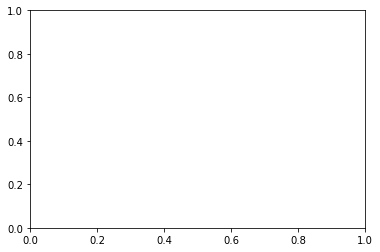

In [77]:
plt.hist(tornadotot, bins=30)